In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Problem 1: the Old Faithful

The data contains waiting times between eruptions and the duration of the eruptions for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA

In [2]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/faithful.csv'
data = pd.read_csv(url,sep = '\s+')
data.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


![old faithful](old_faithful.jpg)

Text(0.5, 0, 'duration of eruption')

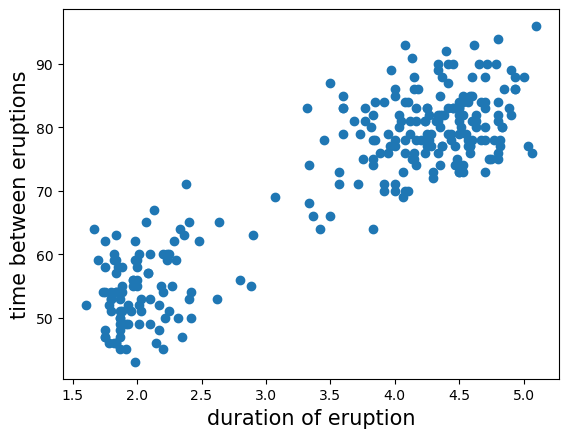

In [3]:
plt.scatter(data.eruptions, data.waiting)
plt.ylabel('time between eruptions', fontsize=15)
plt.xlabel('duration of eruption', fontsize=15)

**Part 1:** Fit a Gaussian Mixture model to the data (with 2 components)

In [4]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(data)

c:\Users\bovam\miniconda3\envs\aispace\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GaussianMixture(n_components=2)

**Part 2:** plot decision boundaries and density contours.

c:\Users\bovam\miniconda3\envs\aispace\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


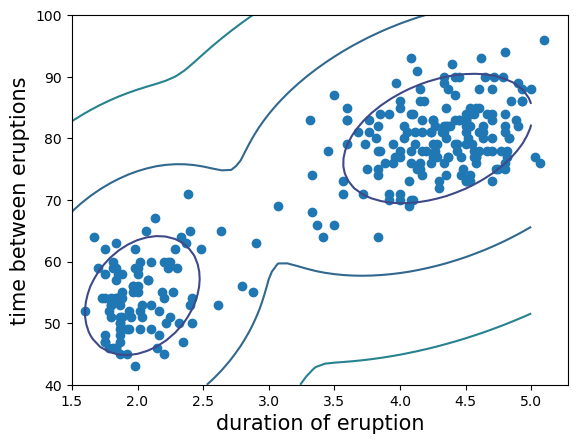

In [5]:
from matplotlib.colors import LogNorm
from sklearn import mixture

x = np.linspace(1.5, 5.0)
y = np.linspace(40, 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),levels=np.logspace(0, 3, 10))
plt.scatter(data.eruptions, data.waiting)
plt.ylabel('time between eruptions', fontsize=15)
plt.xlabel('duration of eruption', fontsize=15)
plt.show()